# CLUSTERING ANALYSIS

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import zscore
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [2]:
# Set plot styles
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 200
sns.set_theme(style='darkgrid', palette='rainbow')

In [3]:
# Load dataset
df = pd.read_excel("https://raw.githubusercontent.com/snehuuu28/Excelr_Data_Science/main/Assignments/Assignment_8/EastWestAirlines.xlsx", skiprows=1)
df.columns = ['Customer', 'Feature1', 'Feature2', 'Feature3', 'Feature4']

# Data Preprocessing

In [4]:
df.describe()

,Customer,Feature1,Feature2,Feature3,Feature4
count,17,13,6,13,18
unique,17,3,3,3,18
top,card. The task is to identify customer segmen...,NUMBER,1,Raw,Description
freq,1,9,3,9,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Customer  17 non-null     object
 1   Feature1  13 non-null     object
 2   Feature2  6 non-null      object
 3   Feature3  13 non-null     object
 4   Feature4  18 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


In [6]:
df.shape

(25, 5)

In [7]:
df.isnull().sum()

,0
Customer,8
Feature1,12
Feature2,19
Feature3,12
Feature4,7


In [8]:
# Data Preprocessing
df.fillna(df.mode().iloc[0], inplace=True)  # Handle missing values

In [9]:
df.isnull().sum()

,0
Customer,0
Feature1,0
Feature2,0
Feature3,0
Feature4,0


In [10]:
# Convert categorical columns to numeric using Label Encoding
label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))


In [11]:
# Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))  # Standardizing numerical columns

In [12]:
df

,Customer,Feature1,Feature2,Feature3,Feature4
0,13,2,0,0,0
1,0,2,0,0,0
2,0,2,0,0,0
3,12,2,0,0,0
4,1,2,0,0,0
5,0,2,0,0,0
6,0,2,0,0,0
7,7,1,2,1,5
8,10,2,0,2,17
9,3,2,1,0,15


In [13]:
# PCA: Reduce to optimal components based on explained variance
pca = PCA(n_components=5)  # Keep 95% of variance
data_pca = pca.fit_transform(data_scaled)

In [14]:
df

,Customer,Feature1,Feature2,Feature3,Feature4
0,13,2,0,0,0
1,0,2,0,0,0
2,0,2,0,0,0
3,12,2,0,0,0
4,1,2,0,0,0
5,0,2,0,0,0
6,0,2,0,0,0
7,7,1,2,1,5
8,10,2,0,2,17
9,3,2,1,0,15


# Implementing Clustering Algorithms

In [15]:
# 1. K-Means Clustering with Hyperparameter Tuning
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

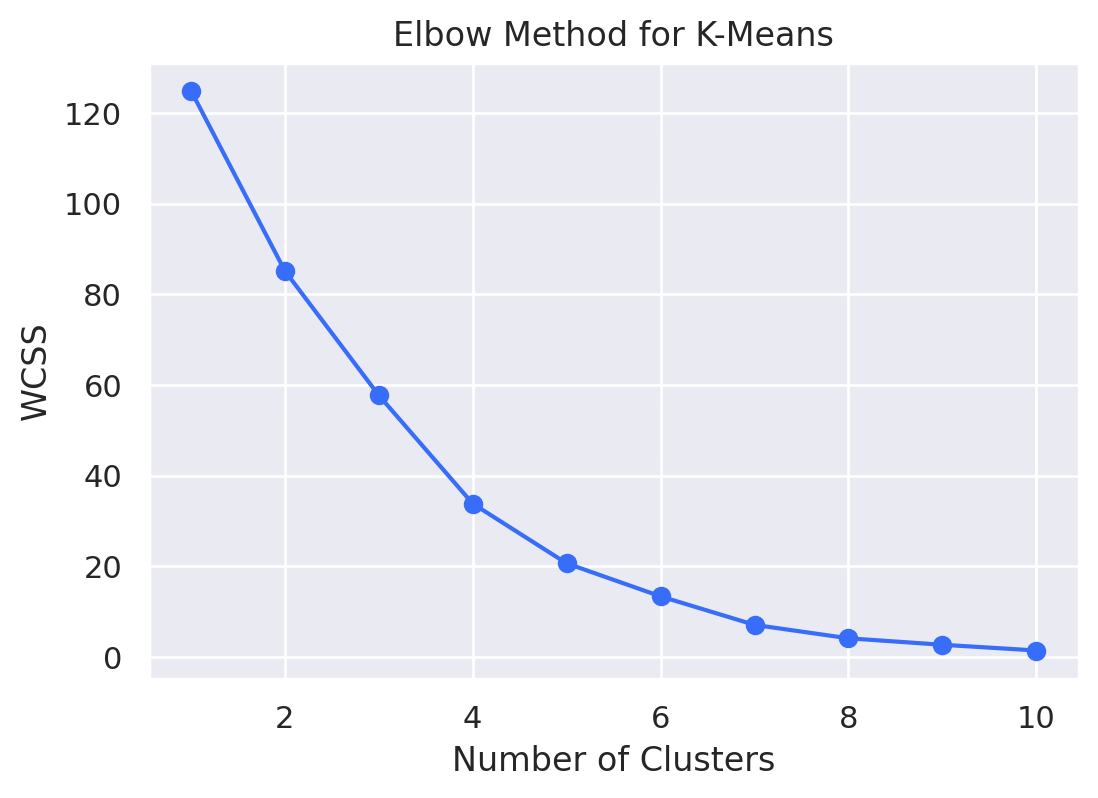

In [16]:
# Elbow method for K
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Cluster Analysis and Interpretation

In [17]:
# Perform K-Means with optimal K (e.g., K=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(data_pca)

In [18]:
# Silhouette Score for K-Means with PCA
silhouette_kmeans = silhouette_score(data_pca, y_kmeans)
print(f"Silhouette Score for K-Means with PCA: {silhouette_kmeans}")

Silhouette Score for K-Means with PCA: 0.45433432500146326


In [19]:
# DBSCAN Hyperparameter Tuning
eps_values = [0.9, 0.5, 0.4]
min_samples_values = [2, 3, 4]
best_silhouette_dbscan = -1
best_eps = 0
best_min_samples = 0
best_dbscan_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        y_dbscan = dbscan.fit_predict(data_pca)

        if len(set(y_dbscan)) > 1:  # Ensure DBSCAN has formed at least 2 clusters
            silhouette_dbscan = silhouette_score(data_pca, y_dbscan)
            if silhouette_dbscan > best_silhouette_dbscan:
                best_silhouette_dbscan = silhouette_dbscan
                best_eps = eps
                best_min_samples = min_samples
                best_dbscan_labels = y_dbscan


In [20]:
# Output results for DBSCAN
print(f"Best Silhouette Score for DBSCAN: {best_silhouette_dbscan}")
print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}")

Best Silhouette Score for DBSCAN: 0.6355663184026028
Best eps: 0.9, Best min_samples: 2


# Visualization

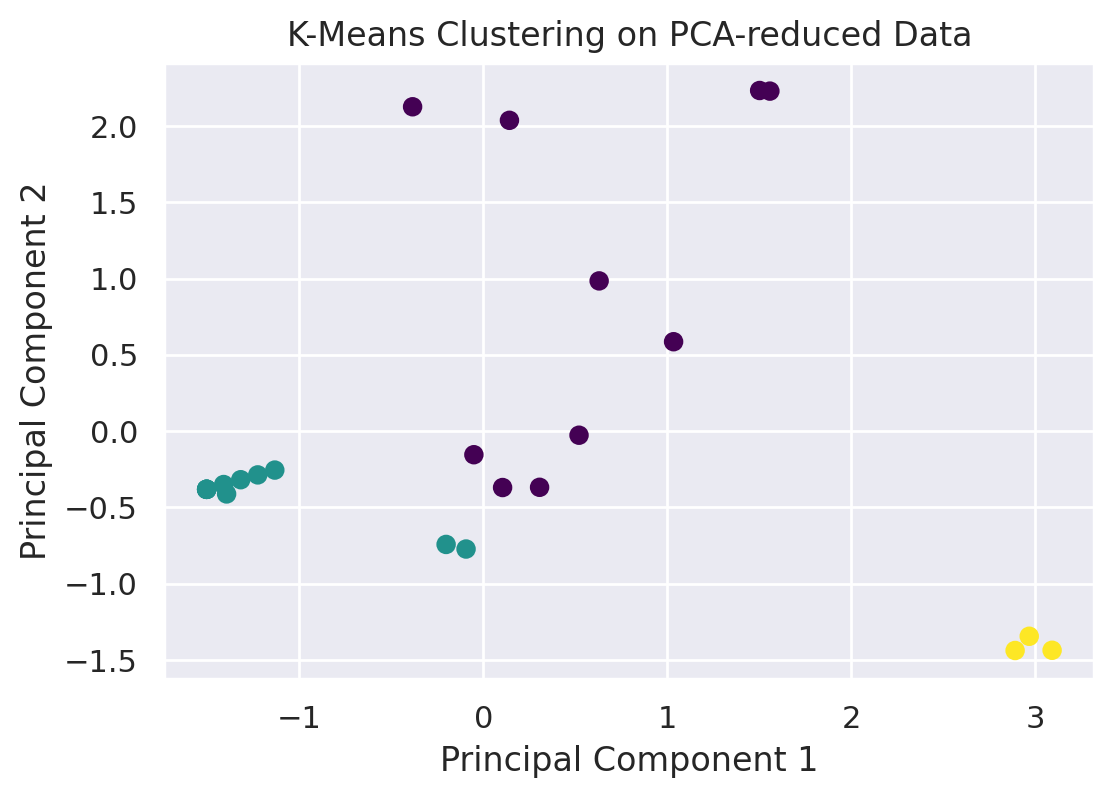

In [21]:
# Visualize K-Means Clustering Results
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.title("K-Means Clustering on PCA-reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [22]:
kmeans_centroids = kmeans.cluster_centers_
print("K-Means Cluster Centers (PCA components):")
print(kmeans_centroids)

K-Means Cluster Centers (PCA components):
[[ 0.53546793  0.92728986 -0.01579371  0.39403078  0.12715673]
 [-1.19167002 -0.42100018  0.08691301 -0.21631806  0.01997866]
 [ 2.98178698 -1.40696548 -0.29500637 -0.4481637  -0.5037704 ]]


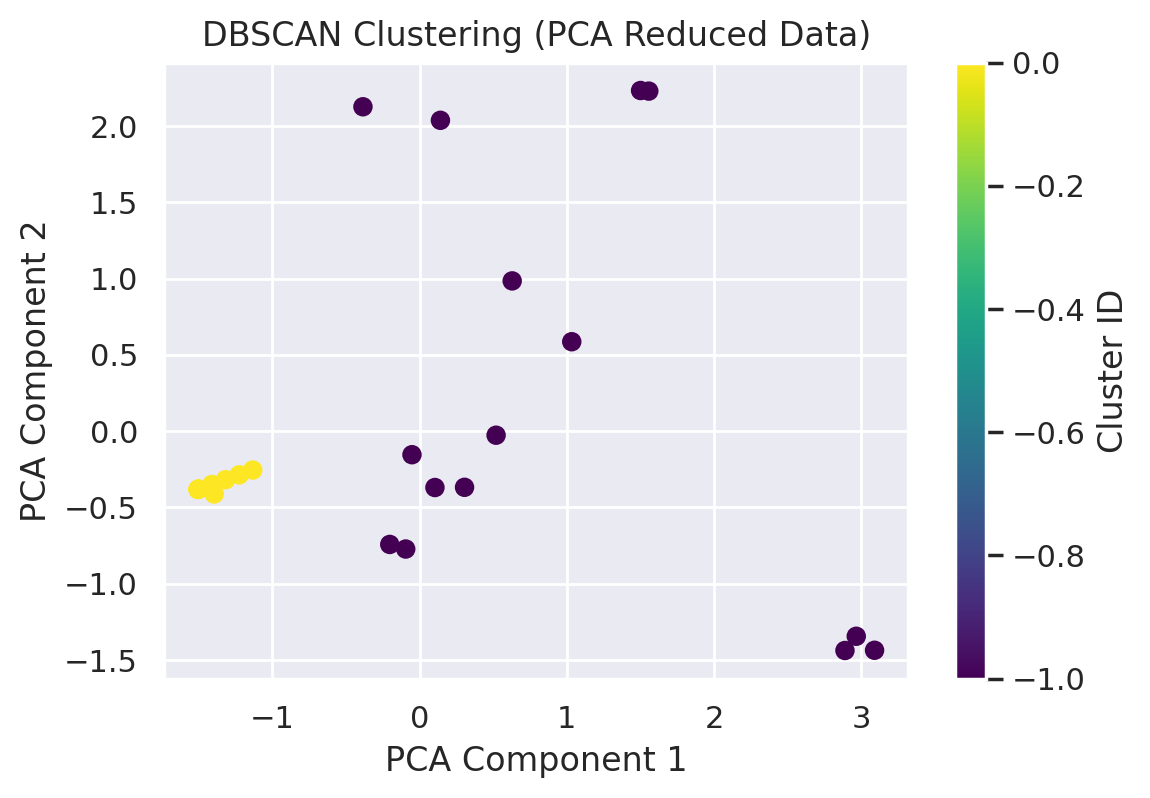

In [23]:
# Assuming y_dbscan contains the cluster labels from DBSCAN
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y_dbscan, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering (PCA Reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster ID')
plt.show()


In [24]:
noise_points = sum(y_dbscan == -1)
print(f"Number of Noise Points in DBSCAN: {noise_points}")

Number of Noise Points in DBSCAN: 15


In [25]:
# Optional: Try Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
y_agg = agg_clust.fit_predict(data_pca)

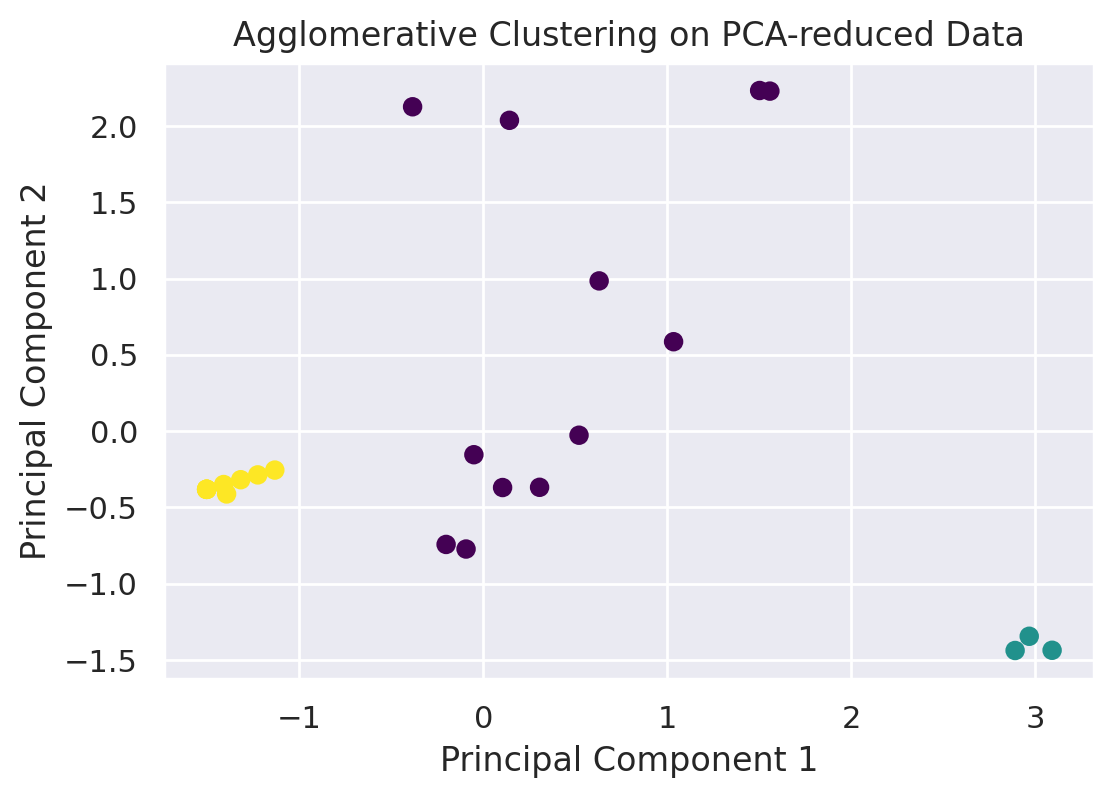

In [26]:
# Visualize Agglomerative Clustering Results
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y_agg, cmap='viridis')
plt.title("Agglomerative Clustering on PCA-reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Evaluation and Performance Metrics:

In [27]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for K-Means clustering
sil_score_kmeans = silhouette_score(data_pca, y_kmeans)
print(f"Silhouette Score for K-Means with PCA: {sil_score_kmeans}")


Silhouette Score for K-Means with PCA: 0.45433432500146326


In [28]:
# Calculate the silhouette score for DBSCAN
print(f"Best Silhouette Score for DBSCAN: {best_silhouette_dbscan}")
print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}")

Best Silhouette Score for DBSCAN: 0.6355663184026028
Best eps: 0.9, Best min_samples: 2


# Interpretation of Silhouette Scores

1) Silhouette Score for K-Means with PCA: 0.454
   
- Interpretation:
A Silhouette Score of 0.454 suggests that K-Means has produced moderately well-defined clusters, but there is room for improvement. The clusters are somewhat cohesive, but they might not be as distinct from each other as they could be.
In general, a score above 0.5 is considered decent, while scores below 0.5 indicate that the clustering might need adjustments (either in the number of clusters, initialization, or the algorithm used).

2) Best Silhouette Score for DBSCAN: 0.636

- Interpretation:
A Silhouette Score of 0.636 for DBSCAN indicates a better clustering result compared to K-Means in this case. The score is relatively high, suggesting that the clusters identified by DBSCAN are reasonably well-separated and cohesive.
DBSCAN's strength lies in its ability to detect arbitrarily shaped clusters and handle noise (points labeled as -1). This score suggests that DBSCAN has successfully identified meaningful clusters and excluded noisy data points effectively.

# Comparison between K-Means and DBSCAN:

- DBSCAN has a higher silhouette score (0.636) compared to K-Means (0.454), which suggests that DBSCAN has better-defined clusters for your dataset.
- The key reason for this could be that DBSCAN is more flexible than K-Means in terms of cluster shape and density. It can form clusters of varying shapes and sizes, while K-Means is constrained to circular or spherical clusters based on the distance metric (Euclidean distance).
- The higher score for DBSCAN indicates that DBSCAN might have found clusters that are more distinct and less likely to overlap, while K-Means may have struggled with overlapping or ill-defined clusters.
